In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# sistema de recomendacion, en base a una matriz de simulutud, de los clientes que realizaron compra en el 2022.
# se obtubo la lista de clientes con cantegoria mayor a normal, los cuales son 47 clientes, los cuales representan cerca del 70% de la utilidad obtenido en este año
# en base a esta lista, se crea una lista de articulos para recomendar, con un nivel de peso de recomendacion.
# todo esto solo con datos del 2022


In [2]:
df_data = pd.read_csv('./data_con_articulos.csv')

In [3]:
df_data.head(5)

,creado,fecha,proyecto,vendedor,tipo_de_cliente,cliente,cantidad,articulo,costo,impresión,...,pastillero,cangurera,navaja,audífonos,pañalera,bata,mascarilla,almohada,peluche,termómetro
0,2018-10-29 10:15:30,2018-10-01,PS1808080202,CRISTIAN HERNANDEZ,RECURRENTE,VMACS,10.0,HIELERA,88.07,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2018-11-07 09:04:28,2018-10-01,PS1808080202,CRISTIAN HERNANDEZ,RECURRENTE,VMACS,10.0,MOCHILA METROPOLITAN,451.33,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2018-11-07 09:04:28,2018-10-01,PS1808080202,CRISTIAN HERNANDEZ,RECURRENTE,VMACS,10.0,MALETA TRAVEL,228.13,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2018-11-07 09:04:28,2018-10-01,PS1808080202,CRISTIAN HERNANDEZ,RECURRENTE,VMACS,10.0,PORTA PASAPORTE,86.32,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2018-11-07 09:19:25,2018-10-02,AS1809240301,CRISTIAN HERNANDEZ,NUEVO,TUS EVENTOS,50.0,MOUSE PAD,9.69,19.8,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_data_2022 = df_data[df_data.fecha.between('2022-01-01', '2023-01-01')]

In [5]:
df_data_cliente_2022 = df_data_2022.groupby('cliente').sum()

In [6]:
list(df_data_cliente_2022.columns)[:11]

['cantidad',
 'costo',
 'impresión',
 'precio',
 'total',
 'mermas',
 'paqueteria_o_gasto_extra',
 'utilidad_real',
 'inversion',
 'utilidad_real/cantidad',
 'bolsa']

In [7]:
df_data_cliente_2022.drop(columns=['cantidad',
 'costo',
 'impresión',
 'precio',
 'total',
 'mermas',
 'paqueteria_o_gasto_extra',
 'utilidad_real',
 'inversion',
 'utilidad_real/cantidad'],inplace=True)

In [8]:
df_data_cliente_2022

,bolsa,destapadores,llavero,antiestrés,inflables,banderines,alcancías,botella,termo,cilindro,...,pastillero,cangurera,navaja,audífonos,pañalera,bata,mascarilla,almohada,peluche,termómetro
cliente,,,,,,,,,,,,,,,,,,,,,
ADHETEC,0,0,5,0,0,0,0,0,0,8,...,0,1,0,0,0,0,0,0,0,0
ADRIAN GUEVARA,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADRIANA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADSPACE,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
AEROMAR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAKULT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEISS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gerardo lomeli,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

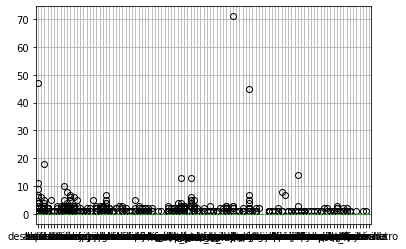

In [9]:
df_data_cliente_2022.boxplot()

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
df_data_cliente_2022_escalado = scaler.fit_transform(df_data_cliente_2022)

In [13]:
df_data_cliente_2022_escalado = pd.DataFrame(df_data_cliente_2022_escalado , columns=df_data_cliente_2022.columns)

In [14]:
df_data_cliente_2022.index

Index(['ADHETEC', 'ADRIAN GUEVARA', 'ADRIANA', 'ADSPACE', 'AEROMAR',
       'AGRINOVA', 'AKUBICA', 'ALCOM ELECTRÓNICOS DE MÉXICO', 'ALEJANDRA LEPE',
       'ALEJANDRA LEPE(RESURTIDO)',
       ...
       'VISIÓN GRAFICA', 'VUDA AUDITORIAS', 'WILD CANYON', 'WILSON LOPEZ',
       'XPRESSO EN CREATIVIDAD', 'YAKULT', 'ZEISS', 'gerardo lomeli',
       'hirschvogel', 'ic.veronicabarajas'],
      dtype='object', name='cliente', length=312)

In [15]:
df_data_cliente_2022_escalado.head(1)

,bolsa,destapadores,llavero,antiestrés,inflables,banderines,alcancías,botella,termo,cilindro,...,pastillero,cangurera,navaja,audífonos,pañalera,bata,mascarilla,almohada,peluche,termómetro
0,-0.175058,-0.117668,4.159635,-0.271066,-0.066766,-0.098533,-0.102863,-0.14435,-0.314425,11.614792,...,-0.080322,6.607118,-0.107608,-0.098533,0.0,-0.056705,0.0,-0.056705,-0.056705,0.0


In [16]:
df_data_cliente_2022_escalado.set_index(df_data_cliente_2022.index, inplace=True)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scalermin = MinMaxScaler()

In [24]:
df_data_cliente_2022_escalado_min = scalermin.fit_transform(df_data_cliente_2022)

In [26]:
df_data_cliente_2022_escalado_min = pd.DataFrame(df_data_cliente_2022_escalado_min , columns=df_data_cliente_2022.columns)

In [30]:
df_data_cliente_2022_escalado_min

,bolsa,destapadores,llavero,antiestrés,inflables,banderines,alcancías,botella,termo,cilindro,...,pastillero,cangurera,navaja,audífonos,pañalera,bata,mascarilla,almohada,peluche,termómetro
cliente,,,,,,,,,,,,,,,,,,,,,
ADHETEC,0.000000,0.0,0.277778,0.0,0.0,0.0,0.0,0.0,0.0,1.000,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADRIAN GUEVARA,0.042553,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADRIANA,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADSPACE,0.000000,0.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.1,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AEROMAR,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAKULT,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZEISS,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gerardo lomeli,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df_data_cliente_2022_escalado_min.set_index(df_data_cliente_2022.index, inplace=True)

In [33]:
distancias_cliente_2022_escalado_min = pd.DataFrame(1/(1 + squareform(pdist(df_data_cliente_2022_escalado_min))), columns = df_data_cliente_2022_escalado_min.index, index = df_data_cliente_2022_escalado_min.index)

In [35]:
distancias_cliente_2022_escalado_min.head(1)

cliente,ADHETEC,ADRIAN GUEVARA,ADRIANA,ADSPACE,AEROMAR,AGRINOVA,AKUBICA,ALCOM ELECTRÓNICOS DE MÉXICO,ALEJANDRA LEPE,ALEJANDRA LEPE(RESURTIDO),...,VISIÓN GRAFICA,VUDA AUDITORIAS,WILD CANYON,WILSON LOPEZ,XPRESSO EN CREATIVIDAD,YAKULT,ZEISS,gerardo lomeli,hirschvogel,ic.veronicabarajas
cliente,,,,,,,,,,,,,,,,,,,,,
ADHETEC,1.0,0.374266,0.333884,0.259995,0.339309,0.357289,0.380823,0.375597,0.304232,0.373266,...,0.377026,0.372353,0.351323,0.374425,0.378072,0.377026,0.36033,0.377026,0.377026,0.369865


In [31]:

from scipy.spatial.distance import pdist, squareform

In [32]:
pd.DataFrame(squareform(pdist(df_data_cliente_2022)), columns = df_data_cliente_2022.index, index = df_data_cliente_2022.index)

cliente,ADHETEC,ADRIAN GUEVARA,ADRIANA,ADSPACE,AEROMAR,AGRINOVA,AKUBICA,ALCOM ELECTRÓNICOS DE MÉXICO,ALEJANDRA LEPE,ALEJANDRA LEPE(RESURTIDO),...,VISIÓN GRAFICA,VUDA AUDITORIAS,WILD CANYON,WILSON LOPEZ,XPRESSO EN CREATIVIDAD,YAKULT,ZEISS,gerardo lomeli,hirschvogel,ic.veronicabarajas
cliente,,,,,,,,,,,,,,,,,,,,,
ADHETEC,0.000000,16.703293,16.431677,16.124515,16.492423,16.583124,15.684387,16.186414,17.521415,16.492423,...,16.370706,16.401219,15.231546,16.462078,15.716234,16.370706,16.733201,16.370706,16.370706,16.492423
ADRIAN GUEVARA,16.703293,0.000000,3.316625,6.403124,3.000000,3.464102,3.000000,3.000000,6.928203,3.000000,...,3.000000,3.162278,3.316625,2.828427,3.162278,3.000000,4.123106,3.000000,3.000000,3.000000
ADRIANA,16.431677,3.316625,0.000000,5.656854,2.000000,2.645751,2.000000,2.000000,6.557439,2.000000,...,2.000000,1.732051,2.449490,1.732051,2.236068,1.414214,3.464102,1.414214,1.414214,2.000000
ADSPACE,16.124515,6.403124,5.656854,0.000000,5.830952,6.082763,5.656854,5.830952,7.937254,5.291503,...,5.830952,5.916080,5.656854,5.744563,5.744563,5.830952,6.480741,5.830952,5.830952,5.656854
AEROMAR,16.492423,3.000000,2.000000,5.830952,0.000000,2.236068,1.414214,1.414214,6.403124,1.414214,...,1.414214,1.732051,2.000000,1.000000,1.732051,1.414214,3.162278,1.414214,1.414214,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAKULT,16.370706,3.000000,1.414214,5.830952,1.414214,2.236068,1.414214,1.414214,6.403124,1.414214,...,1.414214,1.000000,2.000000,1.000000,1.732051,0.000000,3.162278,0.000000,0.000000,1.414214
ZEISS,16.733201,4.123106,3.464102,6.480741,3.162278,3.605551,3.162278,3.162278,7.000000,3.162278,...,3.162278,3.316625,3.464102,3.000000,3.316625,3.162278,0.000000,3.162278,3.162278,3.162278
gerardo lomeli,16.370706,3.000000,1.414214,5.830952,1.414214,2.236068,1.414214,1.414214,6.403124,1.414214,...,1.414214,1.000000,2.000000,1.000000,1.732051,0.000000,3.162278,0.000000,0.000000,1.414214


pd.DataFrame(squareform(pdist(df_calif)), columns = df_calif.index, index = df_calif.index)

In [19]:
distancias_cliente_2022 = pd.DataFrame(1/(1 + squareform(pdist(df_data_cliente_2022))), columns = df_data_cliente_2022.index, index = df_data_cliente_2022.index)

In [20]:
distancias_cliente_2022_escalado = pd.DataFrame(1/(1 + squareform(pdist(df_data_cliente_2022_escalado))), columns = df_data_cliente_2022_escalado.index, index = df_data_cliente_2022_escalado.index)

In [21]:
distancias_cliente_2022.head(5)

cliente,ADHETEC,ADRIAN GUEVARA,ADRIANA,ADSPACE,AEROMAR,AGRINOVA,AKUBICA,ALCOM ELECTRÓNICOS DE MÉXICO,ALEJANDRA LEPE,ALEJANDRA LEPE(RESURTIDO),...,VISIÓN GRAFICA,VUDA AUDITORIAS,WILD CANYON,WILSON LOPEZ,XPRESSO EN CREATIVIDAD,YAKULT,ZEISS,gerardo lomeli,hirschvogel,ic.veronicabarajas
cliente,,,,,,,,,,,,,,,,,,,,,
ADHETEC,1.000000,0.056487,0.057367,0.058396,0.057168,0.056873,0.059936,0.058185,0.053992,0.057168,...,0.057568,0.057467,0.061608,0.057267,0.059822,0.057568,0.056391,0.057568,0.057568,0.057168
ADRIAN GUEVARA,0.056487,1.000000,0.231662,0.135078,0.250000,0.224009,0.250000,0.250000,0.126132,0.250000,...,0.250000,0.240253,0.231662,0.261204,0.240253,0.250000,0.195194,0.250000,0.250000,0.250000
ADRIANA,0.057367,0.231662,1.000000,0.150221,0.333333,0.274292,0.333333,0.333333,0.132320,0.333333,...,0.333333,0.366025,0.289898,0.366025,0.309017,0.414214,0.224009,0.414214,0.414214,0.333333
ADSPACE,0.058396,0.135078,0.150221,1.000000,0.146392,0.141188,0.150221,0.146392,0.111891,0.158945,...,0.146392,0.144591,0.150221,0.148268,0.148268,0.146392,0.133677,0.146392,0.146392,0.150221
AEROMAR,0.057168,0.250000,0.333333,0.146392,1.000000,0.309017,0.414214,0.414214,0.135078,0.414214,...,0.414214,0.366025,0.333333,0.500000,0.366025,0.414214,0.240253,0.414214,0.414214,0.414214


In [22]:
distancias_cliente_2022_escalado.head(5)

cliente,ADHETEC,ADRIAN GUEVARA,ADRIANA,ADSPACE,AEROMAR,AGRINOVA,AKUBICA,ALCOM ELECTRÓNICOS DE MÉXICO,ALEJANDRA LEPE,ALEJANDRA LEPE(RESURTIDO),...,VISIÓN GRAFICA,VUDA AUDITORIAS,WILD CANYON,WILSON LOPEZ,XPRESSO EN CREATIVIDAD,YAKULT,ZEISS,gerardo lomeli,hirschvogel,ic.veronicabarajas
cliente,,,,,,,,,,,,,,,,,,,,,
ADHETEC,1.000000,0.048885,0.046700,0.028351,0.036661,0.045437,0.050151,0.049373,0.036391,0.048728,...,0.049327,0.049092,0.050211,0.048951,0.049460,0.049319,0.046806,0.049319,0.049319,0.048602
ADRIAN GUEVARA,0.048885,1.000000,0.125946,0.033056,0.053413,0.110388,0.425490,0.425465,0.051969,0.315493,...,0.362907,0.279333,0.142408,0.491203,0.220857,0.364491,0.139063,0.364491,0.364491,0.277394
ADRIANA,0.046700,0.125946,1.000000,0.033915,0.050060,0.086701,0.126316,0.126316,0.048870,0.123121,...,0.124890,0.125293,0.099295,0.127191,0.115659,0.129578,0.098194,0.129578,0.129578,0.120969
ADSPACE,0.028351,0.033056,0.033915,1.000000,0.028433,0.031943,0.033090,0.033062,0.028390,0.033422,...,0.033039,0.032972,0.032542,0.033076,0.032893,0.033039,0.032401,0.033039,0.033039,0.033184
AEROMAR,0.036661,0.053413,0.050060,0.028433,1.000000,0.048988,0.053439,0.053439,0.037892,0.053208,...,0.053337,0.053053,0.050865,0.053499,0.052603,0.053341,0.050722,0.053341,0.053341,0.053043


In [20]:
valores_cliente = distancias_cliente_2022['ADHETEC'][1:]

In [21]:
def recomendaciones_cliente(cliente):
    distancias_cliente = distancias_cliente_2022[cliente].drop(index = [cliente])
    df_resto = df_data_cliente_2022.T.drop(columns = [cliente])
    for otro_cliente, peso in distancias_cliente.items():
        df_resto[otro_cliente] = df_resto[otro_cliente] * peso

    return df_resto.sum(axis=1)

In [99]:
recomendaciones_cliente('ADHETEC').sort_values(ascending=False).head(20)

bolígrafo        8.310835
bolsa            6.823197
termo            4.347580
mochila          3.862732
libreta          3.763994
taza             3.065886
cilindro         3.040732
porta            3.031191
llavero          2.989307
cubrebocas       2.387735
usb              2.210369
pelota           2.116880
set              2.001914
vaso             1.930261
antiestrés       1.772589
playera          1.558245
gorra            1.329709
antibacterial    0.949356
lonchera         0.869287
celular          0.850516
dtype: float64

In [22]:
recomendaciones_cliente('ADHETEC').sort_values(ascending=False).head(20)

bolígrafo        8.310835
bolsa            6.823197
termo            4.347580
mochila          3.862732
libreta          3.763994
taza             3.065886
cilindro         3.040732
porta            3.031191
llavero          2.989307
cubrebocas       2.387735
usb              2.210369
pelota           2.116880
set              2.001914
vaso             1.930261
antiestrés       1.772589
playera          1.558245
gorra            1.329709
antibacterial    0.949356
lonchera         0.869287
celular          0.850516
dtype: float64

In [38]:
df_data_cluster = pd.read_csv('./data_total_cluster_articulo_final_5.csv')

In [39]:
df_data_cluster.head(1)

,creado,fecha,proyecto,vendedor,tipo_de_cliente,cliente,cantidad,articulo,costo,impresión,...,navaja,audífonos,pañalera,bata,mascarilla,almohada,peluche,termómetro,cluster_names,articulo_unico
0,2018-10-29 10:15:30,2018-10-01,PS1808080202,CRISTIAN HERNANDEZ,RECURRENTE,VMACS,10.0,HIELERA,88.07,0.0,...,0,0,0,0,0,0,0,0,missing,missing


In [40]:
df_data_cluster_2022 = df_data_cluster[df_data_cluster.fecha.between('2022-01-01', '2023-01-01')]

In [41]:
df_data_cluster_2022.head(1)

,creado,fecha,proyecto,vendedor,tipo_de_cliente,cliente,cantidad,articulo,costo,impresión,...,navaja,audífonos,pañalera,bata,mascarilla,almohada,peluche,termómetro,cluster_names,articulo_unico
2729,2022-01-04 17:09:23,2022-01-03,AS20220103033,CRISTIAN HERNANDEZ,RECURRENTE,MXL PROMOS,102.0,BOLIGRAFO METALICO,21.825,0.0,...,0,0,0,0,0,0,0,0,normal,bolígrafo


In [42]:
df_data_cluster_2022.cluster_names.value_counts()

normal      640
bronce      478
plata       178
diamante     96
oro          66
Name: cluster_names, dtype: int64

In [43]:
df_data_cluster_2022= df_data_cluster_2022[['cliente','cluster_names']]

In [44]:
df_data_cluster_2022 = df_data_cluster_2022.groupby('cliente').agg(pd.Series.mode)[['cluster_names']]

In [45]:
df_data_cluster_2022.cluster_names.value_counts()

normal      265
bronce       39
plata         5
diamante      2
oro           1
Name: cluster_names, dtype: int64

In [46]:
lista_clientes_no_normal_2022 = df_data_cluster_2022[df_data_cluster_2022.cluster_names != 'normal'].reset_index()

In [47]:
lista_clientes_no_normal_2022

,cliente,cluster_names
0,ADHETEC,bronce
1,ADSPACE,bronce
2,ALEJANDRA LEPE,bronce
3,ALFONSO MUÑOZ,bronce
4,ANDRE PRODUCTOS,bronce
5,BANJERCITO,plata
6,BERENICE GALLEGOS,bronce
7,CARLOS QUILPAS,bronce
8,CASA ARMANDO GUILLERMO PRIETO,bronce
9,CENCOR,bronce


In [167]:
lista_clientes_no_normal_2022.to_csv('lista_clientes_no_normal_2022.csv', index=False, encoding='utf-8') 

In [48]:
lista_clientes = list(df_data_cluster_2022[df_data_cluster_2022.cluster_names != 'normal'].reset_index().cliente)

In [49]:
lista_clientes

['ADHETEC',
 'ADSPACE',
 'ALEJANDRA LEPE',
 'ALFONSO MUÑOZ',
 'ANDRE PRODUCTOS',
 'BANJERCITO',
 'BERENICE GALLEGOS',
 'CARLOS QUILPAS',
 'CASA ARMANDO GUILLERMO PRIETO',
 'CENCOR',
 'CREANDO MARCAS',
 'DRUCKIDEE',
 'DSV',
 'EQF',
 'EYMSA',
 'GREENLANDER',
 'GRUPO HAMMER',
 'GRUPO HOTELERO OSTAR (INSALMAR)',
 'GRUPO XCARET',
 'HACIENDA ENCANTADA',
 'HOTEL EL GANZO',
 'HSH IDEA INTERIOR',
 'HYUNDAI',
 'INAI',
 'ISSFAM',
 'JARDINES DE MEXICO',
 'JARDINES DE MÉXICO',
 'LERAM',
 'LOCH MARKETING',
 'MAR NUKS',
 'MEDICAL CENTER',
 'MEXICANA DE BECAS',
 'MITSUBISHI',
 'NEOLPHARMA',
 'NH HOTELES',
 'PILGRIMS',
 'PLASSON',
 'PROMODA',
 'QUIMICA SONS',
 'SERGIO RENAN',
 'SGM',
 'SIGMA',
 'SONS',
 'TMD FRICTION',
 'TOTAL PLAY',
 'TRANSPORTES STAR',
 'VIDANTA']

In [53]:
def recomendaciones_cliente_2(cliente):
    distancias_cliente = distancias_cliente_2022[cliente].drop(index = [cliente])
    df_resto = df_data_cliente_2022.T.drop(columns = [cliente])
    for otro_cliente, peso in distancias_cliente.items():
        df_resto[otro_cliente] = df_resto[otro_cliente] * peso
    return df_resto.sum(axis=1)

In [109]:
data_articulo = recomendaciones_cliente_2(lista_clientes[0]).sort_values(ascending=False)

In [169]:
x=0
for cliente in lista_clientes:
    data_articulo = recomendaciones_cliente_2(cliente).sort_values(ascending=False)
    data_articulo = data_articulo.to_frame().reset_index()
    
    if x>0:
        data_articulo_total = data_articulo_total.merge(data_articulo, on= 'index', how= 'inner')
        
    if x==0:
        data_articulo_total = data_articulo.copy()
        x=x+1
    

C:\Users\sistemas\AppData\Local\Temp\ipykernel_10544\2774630334.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_articulo_total = data_articulo_total.merge(data_articulo, on= 'index', how= 'inner')
C:\Users\sistemas\AppData\Local\Temp\ipykernel_10544\2774630334.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_articulo_total = data_articulo_total.merge(data_articulo, on= 'index', how= 'inner')
C:\Users\sistemas\AppData\Local\Temp\ipykernel_10544\2774630334.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_articulo_total = data_articulo_total.merge(data_articulo, on= 'index', how= 'inner')
C:\Users\sistemas\AppData\Local\Temp\ipykernel_10544\2774630334.py:

In [170]:
data_articulos_recomedados = data_articulo_total.set_index('index').T.sum().sort_values(ascending=False)

In [171]:
data_articulos_recomedados = pd.DataFrame(data_articulos_recomedados).reset_index()

In [172]:
data_articulos_recomedados.columns = ['articulo','recomendacion']

In [173]:
data_articulos_recomedados

,articulo,recomendacion
0,bolígrafo,875.738483
1,bolsa,649.423002
2,termo,458.246419
3,mochila,415.439810
4,libreta,413.550569
...,...,...
98,popsocket,0.000000
99,careta,0.000000
100,cuaderno,0.000000
101,jenga,0.000000


In [174]:
data_articulos_recomedados.to_csv('lista_articulos_recomendacion.csv', index=False, encoding='utf-8') 

In [84]:
df_articulo_total = data_articulo.to_frame().reset_index()

In [100]:
df_articulo_total_3 = data_articulo.to_frame().reset_index()

In [115]:
df_articulo_total.merge(df_articulo_total_3, on= 'index', how= 'inner')

,index,0_x,0_y
0,bolígrafo,8.310835,21.467527
1,bolsa,6.823197,14.812954
2,termo,4.347580,10.918953
3,mochila,3.862732,10.623450
4,libreta,3.763994,10.480592
5,taza,3.065886,7.487739
6,cilindro,3.040732,8.547607
7,porta,3.031191,6.713769
8,llavero,2.989307,6.979438
9,cubrebocas,2.387735,4.969899


In [200]:
df_data_cliente_2022_escalado.head(5)

,bolsa,destapadores,llavero,antiestrés,inflables,banderines,alcancías,botella,termo,cilindro,...,pastillero,cangurera,navaja,audífonos,pañalera,bata,mascarilla,almohada,peluche,termómetro
cliente,,,,,,,,,,,,,,,,,,,,,
ADHETEC,-0.175058,-0.117668,4.159635,-0.271066,-0.066766,-0.098533,-0.102863,-0.14435,-0.314425,11.614792,...,-0.080322,6.607118,-0.107608,-0.098533,0.0,-0.056705,0.0,-0.056705,-0.056705,0.0
ADRIAN GUEVARA,0.520713,-0.117668,-0.172161,-0.271066,-0.066766,-0.098533,-0.102863,-0.14435,-0.314425,-0.276316,...,-0.080322,-0.107608,-0.107608,-0.098533,0.0,-0.056705,0.0,-0.056705,-0.056705,0.0
ADRIANA,-0.175058,-0.117668,-0.172161,-0.271066,-0.066766,-0.098533,-0.102863,-0.14435,-0.314425,-0.276316,...,-0.080322,-0.107608,-0.107608,-0.098533,0.0,-0.056705,0.0,-0.056705,-0.056705,0.0
ADSPACE,-0.175058,-0.117668,-0.172161,2.457079,-0.066766,-0.098533,-0.102863,-0.14435,0.911832,1.210073,...,-0.080322,-0.107608,-0.107608,-0.098533,0.0,-0.056705,0.0,-0.056705,-0.056705,0.0
AEROMAR,-0.175058,-0.117668,-0.172161,-0.271066,-0.066766,-0.098533,-0.102863,-0.14435,-0.314425,-0.276316,...,-0.080322,-0.107608,-0.107608,-0.098533,0.0,-0.056705,0.0,-0.056705,-0.056705,0.0


In [201]:
df_data_cliente_2022_escalado.head(5)

,bolsa,destapadores,llavero,antiestrés,inflables,banderines,alcancías,botella,termo,cilindro,...,pastillero,cangurera,navaja,audífonos,pañalera,bata,mascarilla,almohada,peluche,termómetro
cliente,,,,,,,,,,,,,,,,,,,,,
ADHETEC,-0.175058,-0.117668,4.159635,-0.271066,-0.066766,-0.098533,-0.102863,-0.14435,-0.314425,11.614792,...,-0.080322,6.607118,-0.107608,-0.098533,0.0,-0.056705,0.0,-0.056705,-0.056705,0.0
ADRIAN GUEVARA,0.520713,-0.117668,-0.172161,-0.271066,-0.066766,-0.098533,-0.102863,-0.14435,-0.314425,-0.276316,...,-0.080322,-0.107608,-0.107608,-0.098533,0.0,-0.056705,0.0,-0.056705,-0.056705,0.0
ADRIANA,-0.175058,-0.117668,-0.172161,-0.271066,-0.066766,-0.098533,-0.102863,-0.14435,-0.314425,-0.276316,...,-0.080322,-0.107608,-0.107608,-0.098533,0.0,-0.056705,0.0,-0.056705,-0.056705,0.0
ADSPACE,-0.175058,-0.117668,-0.172161,2.457079,-0.066766,-0.098533,-0.102863,-0.14435,0.911832,1.210073,...,-0.080322,-0.107608,-0.107608,-0.098533,0.0,-0.056705,0.0,-0.056705,-0.056705,0.0
AEROMAR,-0.175058,-0.117668,-0.172161,-0.271066,-0.066766,-0.098533,-0.102863,-0.14435,-0.314425,-0.276316,...,-0.080322,-0.107608,-0.107608,-0.098533,0.0,-0.056705,0.0,-0.056705,-0.056705,0.0


In [189]:
def recomendaciones_cliente_escalado(cliente):
    distancias_cliente = distancias_cliente_2022_escalado[cliente].drop(index = [cliente])
    df_resto = df_data_cliente_2022_escalado.T.drop(columns = [cliente])
    for otro_cliente, peso in distancias_cliente.items():
        df_resto[otro_cliente] = df_resto[otro_cliente] * peso
    return df_resto.sum(axis=1)

In [190]:
x=0
for cliente in lista_clientes:
    data_articulo = recomendaciones_cliente_escalado(cliente).sort_values(ascending=False)
    data_articulo = data_articulo.to_frame().reset_index()
    
    if x>0:
        data_articulo_total = data_articulo_total.merge(data_articulo, on= 'index', how= 'inner')
        
    if x==0:
        data_articulo_total = data_articulo.copy()
        x=x+1
    

C:\Users\sistemas\AppData\Local\Temp\ipykernel_10544\169836864.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_articulo_total = data_articulo_total.merge(data_articulo, on= 'index', how= 'inner')
C:\Users\sistemas\AppData\Local\Temp\ipykernel_10544\169836864.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_articulo_total = data_articulo_total.merge(data_articulo, on= 'index', how= 'inner')
C:\Users\sistemas\AppData\Local\Temp\ipykernel_10544\169836864.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_articulo_total = data_articulo_total.merge(data_articulo, on= 'index', how= 'inner')
C:\Users\sistemas\AppData\Local\Temp\ipykernel_10544\169836864.py:7: F

In [196]:
data_articulos_recomedados_escalado = data_articulo_total.set_index('index').T.sum().sort_values()

In [197]:
data_articulos_recomedados_escalado = pd.DataFrame(data_articulos_recomedados_escalado).reset_index()

In [198]:
data_articulos_recomedados_escalado.columns = ['articulo','recomendacion']

In [202]:
data_articulos_recomedados_escalado.head(20)

,articulo,recomendacion
0,set,-157.508061
1,bolígrafo,-146.535692
2,porta,-122.554071
3,antiestrés,-112.393673
4,vaso,-110.812507
5,celular,-109.221382
6,libreta,-108.803998
7,tarjeta,-108.298055
8,cable,-102.371660
9,termo,-101.398993


In [203]:
data_articulos_recomedados_escalado.to_csv('lista_articulos_recomendacion_escalado.csv', index=False, encoding='utf-8') 

In [50]:
lista_clientes = list(df_data_cluster_2022[df_data_cluster_2022.cluster_names != 'normal'].reset_index().cliente)

In [36]:
distancias_cliente_2022_escalado_min.head(1)

cliente,ADHETEC,ADRIAN GUEVARA,ADRIANA,ADSPACE,AEROMAR,AGRINOVA,AKUBICA,ALCOM ELECTRÓNICOS DE MÉXICO,ALEJANDRA LEPE,ALEJANDRA LEPE(RESURTIDO),...,VISIÓN GRAFICA,VUDA AUDITORIAS,WILD CANYON,WILSON LOPEZ,XPRESSO EN CREATIVIDAD,YAKULT,ZEISS,gerardo lomeli,hirschvogel,ic.veronicabarajas
cliente,,,,,,,,,,,,,,,,,,,,,
ADHETEC,1.0,0.374266,0.333884,0.259995,0.339309,0.357289,0.380823,0.375597,0.304232,0.373266,...,0.377026,0.372353,0.351323,0.374425,0.378072,0.377026,0.36033,0.377026,0.377026,0.369865


In [53]:
def recomendaciones_cliente_escalado_min(cliente):
    distancias_cliente = distancias_cliente_2022_escalado_min[cliente].drop(index = [cliente])
    df_resto = df_data_cliente_2022_escalado_min.T.drop(columns = [cliente])
    for otro_cliente, peso in distancias_cliente.items():
        df_resto[otro_cliente] = df_resto[otro_cliente] * peso
    return df_resto.sum(axis=1)

In [54]:
x=0
for cliente in lista_clientes:
    data_articulo = recomendaciones_cliente_escalado_min(cliente).sort_values(ascending=False)
    data_articulo = data_articulo.to_frame().reset_index()
    
    if x>0:
        data_articulo_total = data_articulo_total.merge(data_articulo, on= 'index', how= 'inner')
        
    if x==0:
        data_articulo_total = data_articulo.copy()
        x=x+1

/var/folders/c0/ffsv0l194g90gxqj1nlsmvdw0000gn/T/ipykernel_33681/2599176747.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_articulo_total = data_articulo_total.merge(data_articulo, on= 'index', how= 'inner')
/var/folders/c0/ffsv0l194g90gxqj1nlsmvdw0000gn/T/ipykernel_33681/2599176747.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_articulo_total = data_articulo_total.merge(data_articulo, on= 'index', how= 'inner')
/var/folders/c0/ffsv0l194g90gxqj1nlsmvdw0000gn/T/ipykernel_33681/2599176747.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_articulo_total = data_articulo_total.merge(data_articulo, on= 'index', how= 'inner')
/var/folders/c0/ffsv0l194g90gxq

In [62]:
data_articulos_recomedados_escalado_min = data_articulo_total.set_index('index').T.sum().sort_values(ascending=False)

In [63]:
data_articulos_recomedados_escalado_min = pd.DataFrame(data_articulos_recomedados_escalado_min).reset_index()

In [64]:
data_articulos_recomedados_escalado_min.columns = ['articulo','recomendacion']

In [65]:
data_articulos_recomedados_escalado_min.head(20)

,articulo,recomendacion
0,libreta,371.781597
1,antiestrés,252.438535
2,pelota,215.870471
3,cinta,204.044678
4,bolígrafo,198.365113
5,tarjeta,196.182565
6,set,174.167738
7,mochila,174.092426
8,sujetador,157.985018
9,usb,139.119874


In [66]:
data_articulos_recomedados_escalado_min.to_csv('lista_articulos_recomendacion_escalado_min.csv', index=False, encoding='utf-8') 